Data Pre-Processing and Preliminary Examination

In [735]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [736]:
# import data
car_data = '/content/Sport car price.csv'
df = pd.read_csv(car_data)
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [737]:
# rename columns to simpler names for easier typing
df.rename(columns={
    'Car Make': 'make',
    'Car Model': 'model',
    'Year': 'year',
    'Engine Size (L)': 'engine_size',
    'Horsepower': 'horsepower',
    'Torque (lb-ft)': 'torque',
    '0-60 MPH Time (seconds)': 'zero_to_sixty',
    'Price (in USD)': 'price'
}, inplace=True)

In [738]:
# count how many rows for each car brand
brand_counts = df['make'].value_counts()
print(brand_counts)

make
Porsche          88
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Dodge            41
Nissan           37
Lotus            35
Jaguar           30
Lexus            26
Maserati         25
Bentley          25
Bugatti          23
Tesla            19
Alfa Romeo       16
Acura            16
Koenigsegg       15
Rimac            14
Pagani           12
Mercedes-AMG     11
Rolls-Royce      10
Toyota            5
Subaru            3
W Motors          3
TVR               2
Pininfarina       2
Ariel             1
Mazda             1
Polestar          1
Shelby            1
Kia               1
Alpine            1
Ultima            1
Name: count, dtype: int64


In [739]:
# keep only brands with at least 10 cars
counts = df['make'].value_counts()
keep = counts[counts >= 10].index
df = df[df['make'].isin(keep)]

In [740]:
# remove electric car makes
electric = ['Tesla', 'Polestar', 'Rimac']
df = df[~df['make'].isin(electric)]

In [741]:
# count how many rows for each car brand
brand_counts = df['make'].value_counts()
print(brand_counts)

make
Porsche          88
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Dodge            41
Nissan           37
Lotus            35
Jaguar           30
Lexus            26
Maserati         25
Bentley          25
Bugatti          23
Acura            16
Alfa Romeo       16
Koenigsegg       15
Pagani           12
Mercedes-AMG     11
Rolls-Royce      10
Name: count, dtype: int64


In [742]:
df.head()

,make,model,year,engine_size,horsepower,torque,zero_to_sixty,price
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   make           952 non-null    object
 1   model          952 non-null    object
 2   year           952 non-null    int64 
 3   engine_size    949 non-null    object
 4   horsepower     952 non-null    object
 5   torque         951 non-null    object
 6   zero_to_sixty  952 non-null    object
 7   price          952 non-null    object
dtypes: int64(1), object(7)
memory usage: 66.9+ KB


In [744]:
# take out commas to use price as a number
df['price'] = df['price'].astype(str).str.replace(',', '', regex=False).astype(int)

# quick check
df[['price']].head()

,price
0,101200
1,274390
2,333750
3,142700
4,298000


In [745]:
# make sure engine_size entries like '2.0' are treated as numbers
df['engine_size'] = df['engine_size'].astype(str).str.strip()

# convert string floats to actual floats, coercing non‑numeric to NaN
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

# drop any rows where conversion failed
df = df.dropna(subset=['engine_size'])

In [746]:
# make sure zero_to_sixty is numeric
df['zero_to_sixty'] = df['zero_to_sixty'].astype(float)

# quick check
df[['zero_to_sixty']].head()

,zero_to_sixty
0,4.0
1,2.8
2,3.0
3,3.2
4,2.7


In [747]:
# make sure horsepower is numeric
df['horsepower'] = df['horsepower'].astype(str).str.replace(',', '', regex=False).astype(int)

# quick check
df[['horsepower']].head()

,horsepower
0,379
1,630
2,661
3,562
4,710


In [748]:
# make sure torque is numeric
df['torque'] = df['torque'].astype(str).str.replace(',', '', regex=False).astype(int)

# quick check
df[['torque']].head()

,torque
0,331
1,443
2,561
3,406
4,568


In [749]:
# drop any cars priced at or over $1,000,000 (outliers throw off models)
df = df[df['price'] <= 999999]

In [750]:
# Percent missing per column
(df.isna().mean() * 100).sort_values(ascending=False)

,0
make,0.0
model,0.0
year,0.0
engine_size,0.0
horsepower,0.0
torque,0.0
zero_to_sixty,0.0
price,0.0


In [751]:
# mean price
df['price'].mean()

np.float64(174412.15287356323)

In [752]:
# median price
df['price'].median()

114000.0

In [753]:
# min price
df['price'].min()

25000

In [754]:
# max price
df['price'].max()

625000

In [755]:
# average year
df['year'].mean()

np.float64(2021.2448275862068)

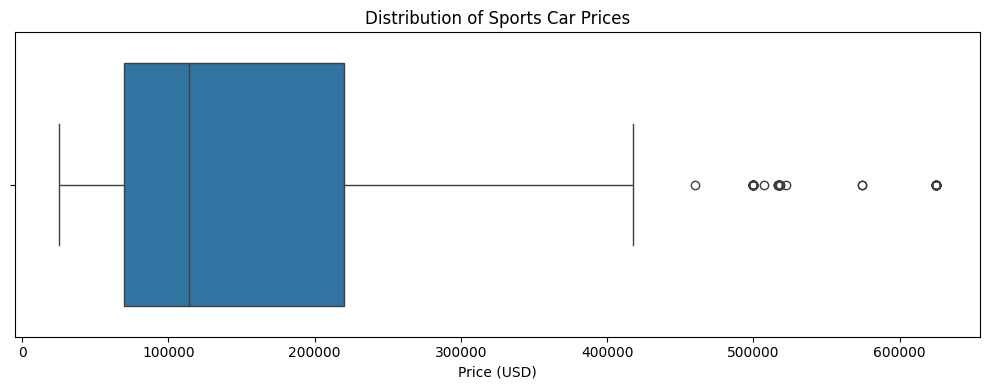

In [756]:
# boxplot showing the spread of sports car prices
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='price')
plt.title('Distribution of Sports Car Prices')
plt.xlabel('Price (USD)')
plt.tight_layout()

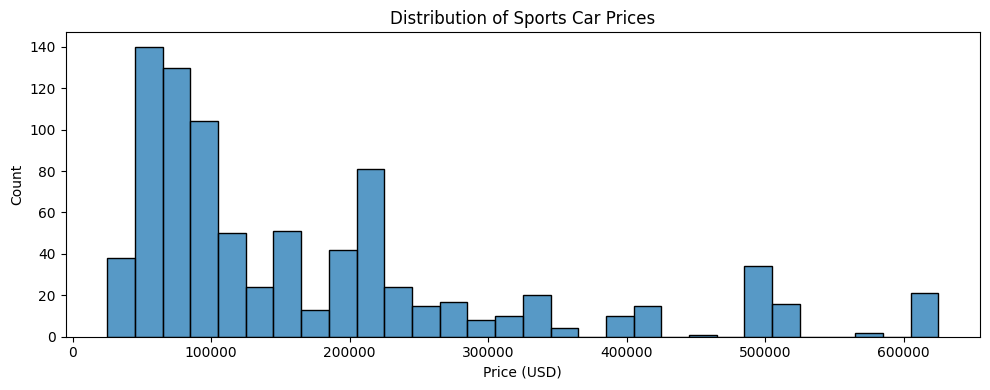

In [757]:
# histogram showing how sports car prices are distributed
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='price', bins=30)
plt.title('Distribution of Sports Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()

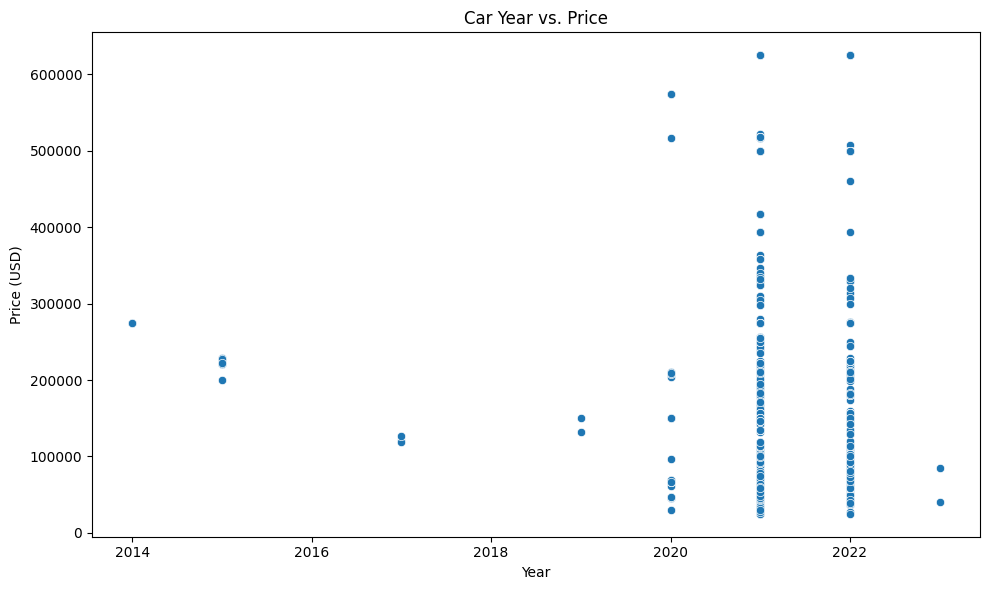

In [758]:
# scatterplot showing how price varies with car year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='price')
plt.title('Car Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

There seems to be minimal correlation here, dont include year in models.

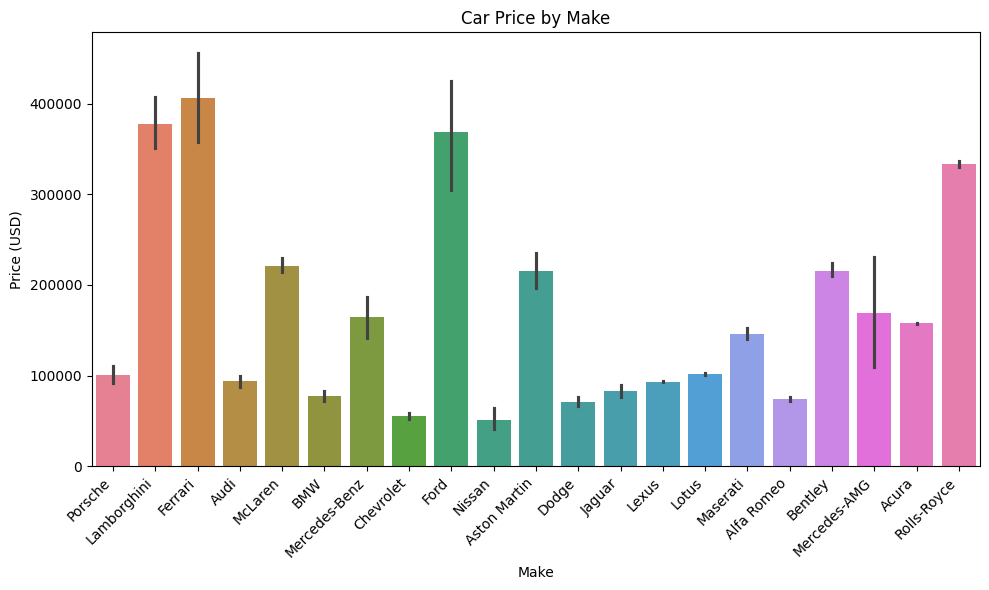

In [759]:
# bar chart of average price by brand, colored by make
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='make', y='price', hue='make')

plt.title('Car Price by Make')
plt.xlabel('Make')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cars prices seem to have high correlation based on their make, include make in models.

Text(0, 0.5, 'Price (USD)')

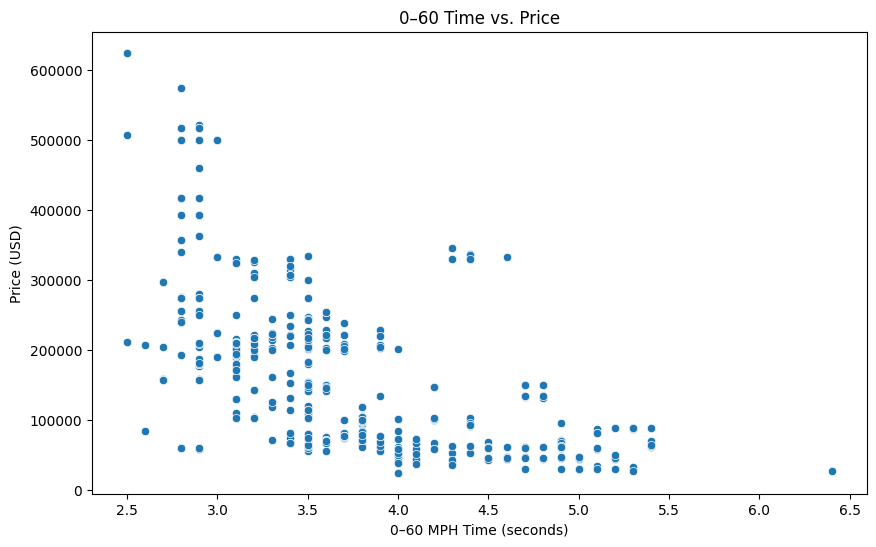

In [760]:
# scatterplot of price vs 0‑60 time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='zero_to_sixty', y='price')

plt.title('0–60 Time vs. Price')
plt.xlabel('0–60 MPH Time (seconds)')
plt.ylabel('Price (USD)')

There seems to be high correlation here, include 0-60 time in models.

Text(0, 0.5, 'Price (USD)')

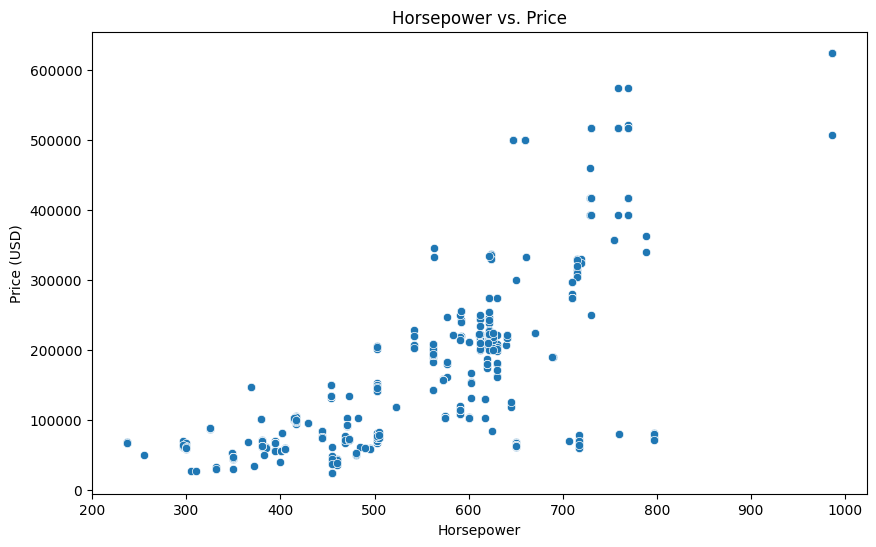

In [761]:
# scatterplot of price vs horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='price')

plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price (USD)')

There seems to be high correlation here, include horsepower in models.

Text(0.5, 1.0, 'Engine Size vs Price')

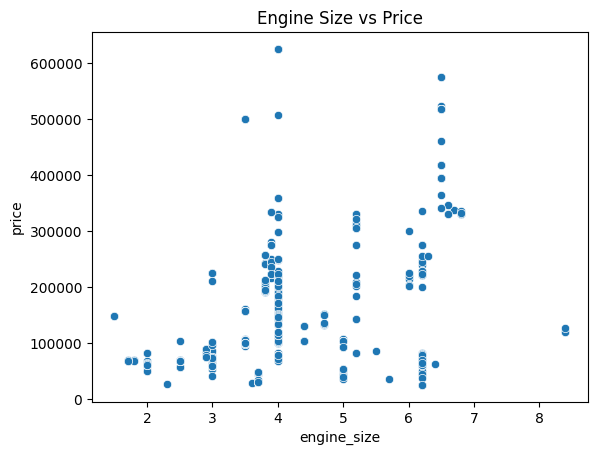

In [762]:
# plot price against engine size
sns.scatterplot(data = df, x = 'engine_size', y = 'price')
plt.title('Engine Size vs Price')

There seems to be minimal correlation here, dont include engine size in models.

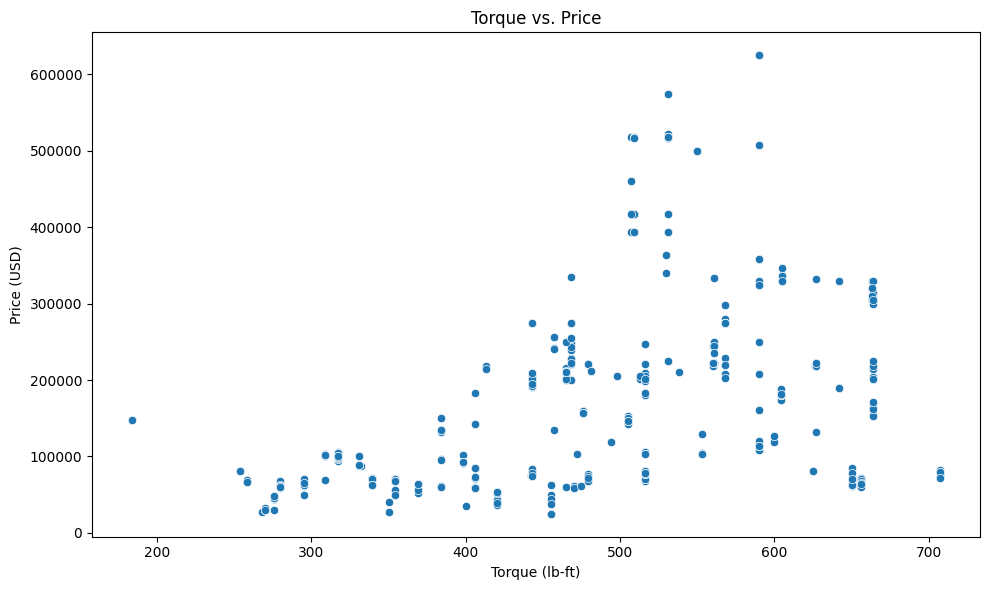

In [763]:
# scatterplot of price vs torque
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='torque', y='price')

plt.title('Torque vs. Price')
plt.xlabel('Torque (lb-ft)')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

There seems to be minimal correlation here, dont include torque in models.

## Modeling

In [764]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [798]:
# baseline: predict the average sale price
avg_price  = df['price'].mean()
baseline_mse  = mean_squared_error(df['price'], np.full(len(df), avg_price))
baseline_rmse = baseline_mse ** 0.5
print(baseline_mse)
print(baseline_rmse)

20448830667.61456
142999.40792749653


Linear Regression Model

In [766]:
# pick the numeric features to use and set the target
X = df[['horsepower', 'zero_to_sixty', 'make']]
y = df['price']

# split the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [767]:
#encode categorical column & scale data
cat_col = ['make']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown='ignore'), cat_col), remainder = StandardScaler())

In [768]:
#create pipeline for linear regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [769]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make'])])),
                ('model', LinearRegression())])

In [770]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

3656880132.132954

In [771]:
print(np.sqrt(mean_squared_error(y_train, y_train_preds)))

60472.14343921467


In [772]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

3198350565.708889

In [773]:
print(np.sqrt(mean_squared_error(y_test, y_test_preds)))

56553.96153859506


In [774]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
horsepower,0.654072
zero_to_sixty,0.026932
make,0.675940


K Nearest Neighbors Model

In [775]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [776]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [777]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [778]:
#use 25 neighbors in model
knn = grid_search.best_estimator_

In [779]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

471094600.1940231

In [780]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

568812463.0993103

In [781]:
# print how far off my predictions are on average (RMSE)
print(np.sqrt(mean_squared_error(y_test, y_test_preds)))

23849.789581866553


In [782]:
# see which features matter most for KNN predictions
result = permutation_importance(knn, X_test, y_test, n_repeats=10)
pd.DataFrame(result.importances_mean, index=X_train.columns)

,0
horsepower,0.829067
zero_to_sixty,0.441921
make,0.776480


Decision Tree Regression Model

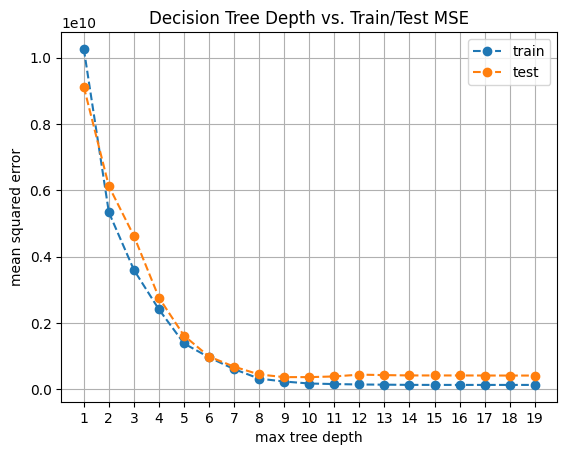

In [783]:
# first turn make & model into numbers for DT
X_train_encoded = transformer.fit_transform(X_train)
X_test_encoded  = transformer.transform(X_test)

train_scores = []
test_scores  = []

for d in range(1, 20):
    # train a tree with max depth = d
    dtree = DecisionTreeRegressor(max_depth=d, random_state=42).fit(X_train_encoded, y_train)

    # predict on train and test sets
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds  = dtree.predict(X_test_encoded)

    # record mean squared error
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test,  y_test_preds))

# plot train vs test MSE for each depth
plt.plot(range(1, 20), train_scores, '--o', label='train')
plt.plot(range(1, 20), test_scores,  '--o', label='test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Train/Test MSE')
plt.show()

In [784]:
#fit a decision tree model with a max depth of 9, the lowest test MSE
dt_pipeline = Pipeline([('encoder', transformer),('tree', DecisionTreeRegressor(max_depth= 9, random_state=21))])
dt_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make'])])),
                ('tree', DecisionTreeRegressor(max_depth=9, random_state=21))])

In [785]:
y_pred = dt_pipeline.predict(X_test)

In [786]:
print(mean_squared_error(y_test, y_pred))

371279060.96400946


In [787]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

19268.602984233432


Random Forest Regression Model

In [788]:
rf_pipeline = Pipeline([('encoder', transformer),('tree', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make'])])),
                ('tree', RandomForestRegressor(random_state=42))])

In [789]:
# try different values for number of trees and depth
param_grid = {'tree__n_estimators': [50, 100, 200], 'tree__max_depth': [None, 5, 10, 20]}

In [790]:
# run grid search to find best number of trees and depth
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [791]:
# run the grid search on the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make'])])),
                                       ('tree',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [None, 5, 10, 20],
                         'tree__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [792]:
# determine best parameters
grid_search.best_params_

{'tree__max_depth': 20, 'tree__n_estimators': 50}

In [793]:
# use max depth of 20 & 50 estimators in model
forest = grid_search.best_estimator_

In [794]:
# calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

178023799.077269

In [795]:
# show how well the model fits the training data (RMSE)
print(np.sqrt(mean_squared_error(y_train, y_train_preds)))

13342.555942444798


In [796]:
# calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

398932701.5820579

In [797]:
# show how well the model fits the test data (RMSE)
print(np.sqrt(mean_squared_error(y_test, y_test_preds)))

19973.29971692354
